<a href="https://colab.research.google.com/github/aniljacob/AIML/blob/main/U4W23_60_Keras_GAN_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objective

At the end of the experiment, you will be able to :

* understand GAN using keras framework

In [ ]:
#@title Experiment Walkthrough Video
from IPython.display import HTML

HTML("""<video width="854" height="480" controls>
  <source src="https://cdn.exec.talentsprint.com/non-processed/2021_06_17_iiith_aiml_Keras_GANs.mp4" type="video/mp4">
</video>
""")

## Dataset

### History

The original MNIST dataset contains handwritten digits. People from AI/ML or Data Science community love this dataset. They use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset they would try on. As per popular belief, If the algorithm doesn’t work on MNIST, it won’t work at all. Well, if algorithm works on MNIST, it may still fail on other datasets.


As per the original [paper](https://arxiv.org/abs/1708.07747) describing about Fashion-MNIST, It is a dataset recomposed from the product pictures of Zalando’s websites. Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms, as it shares the same image size, data format and the structure of training and testing splits.

There are some good reasons for the challenges faced by MNIST dataset:

* MNIST is too easy - Neural networks can achieve 99.7% on MNIST easily, and similarly, even classic ML algorithms can achieve 97%. 

* MNIST is overused - Almost everyone who has experience with deep learning has come across MNIST at least once.

* MNIST cannot represent modern CV task





### Description

The dataset choosen for this experiment is Fashion-MNIST. The dataset is made up of 28x28 grayscale images of 70,000 fashion products from 10 categories, with 7,000 images per category. The training set has 60,000 images and the test set has 10,000 images. 

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.

**Labels / Classes**

0 - T-shirt/top

1 - Trouser

2 - Pullover

3 - Dress

4 - Coat

5 - Sandal

6 - Shirt

7 - Sneaker

8 - Bag

9 - Ankle boot

## AI / ML Technique

### Generative Adversary Networks (GAN)


GANs are generative models devised by Goodfellow et al. in 2014. GAN is about creating, like drawing a portrait or composing a symphony. This is hard compared to other deep learning fields. For instance, it is much easier to identify a Monet painting than painting one.


The main focus of GAN is to generate data from scratch, mostly images but other domains including music have been done.

GAN composes of two deep networks :

* Generator
* Discriminator


#### Generator 

The generator tries to produce data that come from some probability distribution. For example, that would be you trying to reproduce the party’s tickets.

#### Discriminator

The discriminator acts like a judge. It gets to decide if the input comes from the generator or from the true training set. For example, that would be the party’s security comparing your fake ticket with the true ticket to find flaws in your design.

In summary, we can say that :

* The generator trying to maximize the probability of making the discriminator mistake its inputs as real.

* And the discriminator guiding the generator to produce more realistic images.



![alt text](https://cdn.talentsprint.com/aiml/Experiment_related_data/IMAGES/gan.png)

### Setup Steps

In [9]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "2100706" #@param {type:"string"}


In [10]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "7702777831" #@param {type:"string"}


In [11]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

ipython = get_ipython()

notebook= "U4W23_60_Keras_GAN_C" #name of the notebook

def setup():
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing required  Packages




In [3]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt

### Load the Data

In [4]:
# Load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### Visualize the data

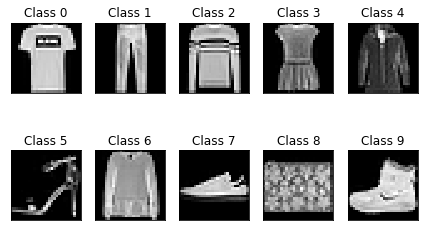

In [5]:
fig = plt.figure()
for i in range(10):
    plt.subplot(2, 5, i+1)
    x_y = X_train[y_train == i]
    plt.imshow(x_y[0], cmap='gray', interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()

### Data Pre-Processing


In [6]:
print('X_train shape', X_train.shape)

# Reshaping the inputs
X_train = X_train.reshape(60000, 28*28)
# Normalizing the inputs (-1, 1)
X_train = (X_train.astype('float32') / 255 - 0.5) * 2

print('X_train reshape:', X_train.shape)

X_train shape (60000, 28, 28)
X_train reshape: (60000, 784)


### Build the Generator Model

In [7]:
# Get the generator model
def build_generator(latent_dim):

  # Generator takes in a vector from the latent space
  i = Input(shape=(latent_dim,))

  # The Leaky ReLU modifies the ReLu function to allow small negative values when the input is less than zero
  # below the threshold value of the activation function, the values will be damped or set to zero
  # alpha governs the slope for values lower than the threshold 
  x = Dense(256, activation=LeakyReLU(alpha=0.2))(i)
  x = BatchNormalization(momentum=0.7)(x)
  x = Dense(512, activation=LeakyReLU(alpha=0.2))(x)
  x = BatchNormalization(momentum=0.7)(x)
  x = Dense(1024, activation=LeakyReLU(alpha=0.2))(x)
  x = BatchNormalization(momentum=0.7)(x)

  # Because our image pixels are censored to be between -1 and +1 use tanh activation function
  # The range of the tanh function is from (-1 to 1)
  x = Dense(784, activation='tanh')(x)

  model = Model(i, x)
  return model


# Dimensionality of the latent space
latent_dim = 100 # Can be replaced with any number

generator = build_generator(latent_dim)

# Display the summary representation of the model
generator.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense (Dense)                (None, 256)               25856     
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              525312    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1024)              4096  

### Build the Discriminator Model

In [8]:
# Get the discriminator model
def build_discriminator(img_size):
  i = Input(shape=(img_size,))
  x = Dense(1024, activation=LeakyReLU(alpha=0.2))(i)
  x = Dense(512, activation=LeakyReLU(alpha=0.2))(x)
  x = Dense(256, activation=LeakyReLU(alpha=0.2))(x)
  
  # Since discriminator performs a binary classification we use sigmoid activation function
  x = Dense(1, activation='sigmoid')(x)

  model = Model(i, x)
  return model

discriminator = build_discriminator(784)

#### Discriminator model visualization

In [9]:
# Display the summary representation of the model
discriminator.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 1,460,225
Trainable params: 1,460,225
Non-trainable params: 0
_________________________________________________________________


### Compile the Discriminator Model

In [10]:
# Optimizer
optimizer = Adam(lr=0.0002, beta_1=0.5)
discriminator.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

In [11]:
# Create an input to represent noise sample from latent space
noise = Input(shape=(latent_dim,))

# Pass noise through generator to get an image
img = generator(noise)

# Freeze the discriminator layers
# Make sure only the generator is trained
discriminator.trainable = False

Pass output image of the generator as input to the discriminator model

In [12]:
# The true output is fake, but we label them real!
fake_pred = discriminator(img)

### Combined network

#### Build and compile the combined model

Create a new model object called **combined model** which takes input a `noise` sample and produces the output prediction (fake)

In [13]:
# Create the combined model object
combined_model = Model(noise, fake_pred)

In [14]:
# Display the summary representation of the model
combined_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
model (Functional)           (None, 784)               1493520   
_________________________________________________________________
model_1 (Functional)         (None, 1)                 1460225   
Total params: 2,953,745
Trainable params: 1,489,936
Non-trainable params: 1,463,809
_________________________________________________________________


In [15]:
# Compile the combined model
combined_model.compile(loss='binary_crossentropy', optimizer = optimizer, metrics=['binary_accuracy'])

### Train the Model


We train the discriminator and the generator in turn in a loop as follows:

1. Set the discriminator trainable
2. Train the discriminator with the real digit images and the images generated by the generator to classify the real and fake images.
3. Set the discriminator non-trainable
4. Train the generator as part of the GAN. We feed latent samples into the GAN and let the generator to produce digit images and use the discriminator to classify the image.

The below code cell for 120 epochs, takes around 50 mins to complete the execution

epoch = 1/120, d_loss=0.597, g_loss=1.457                                                                                                     


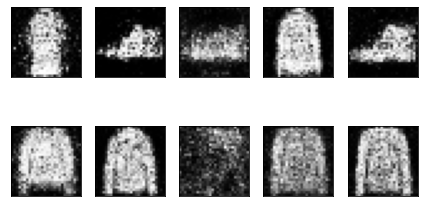

epoch = 2/120, d_loss=0.614, g_loss=1.576                                                                                                     
epoch = 3/120, d_loss=0.570, g_loss=1.556                                                                                                     
epoch = 4/120, d_loss=0.599, g_loss=1.525                                                                                                     
epoch = 5/120, d_loss=0.599, g_loss=1.507                                                                                                     
epoch = 6/120, d_loss=0.600, g_loss=1.398                                                                                                     
epoch = 7/120, d_loss=0.602, g_loss=1.405                                                                                                     
epoch = 8/120, d_loss=0.596, g_loss=1.439                                                                                                     

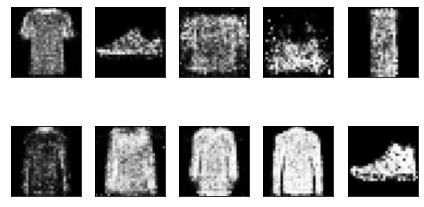

epoch = 12/120, d_loss=0.569, g_loss=1.443                                                                                                     
epoch = 13/120, d_loss=0.569, g_loss=1.516                                                                                                     
epoch = 14/120, d_loss=0.592, g_loss=1.615                                                                                                     
epoch = 15/120, d_loss=0.564, g_loss=1.504                                                                                                     
epoch = 16/120, d_loss=0.519, g_loss=1.677                                                                                                     
epoch = 17/120, d_loss=0.527, g_loss=1.676                                                                                                     
epoch = 18/120, d_loss=0.551, g_loss=1.785                                                                                              

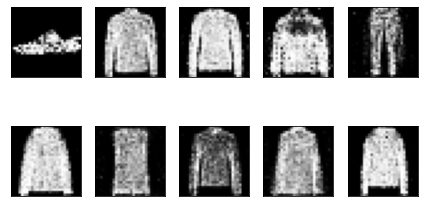

epoch = 22/120, d_loss=0.554, g_loss=1.726                                                                                                     
epoch = 23/120, d_loss=0.538, g_loss=1.703                                                                                                     
epoch = 24/120, d_loss=0.507, g_loss=1.681                                                                                                     
epoch = 25/120, d_loss=0.521, g_loss=1.816                                                                                                     
epoch = 26/120, d_loss=0.497, g_loss=1.887                                                                                                     
epoch = 27/120, d_loss=0.512, g_loss=1.765                                                                                                     
epoch = 28/120, d_loss=0.558, g_loss=1.840                                                                                              

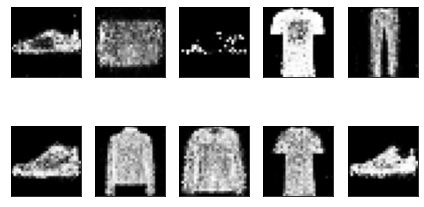

epoch = 32/120, d_loss=0.528, g_loss=1.930                                                                                                     
epoch = 33/120, d_loss=0.513, g_loss=2.139                                                                                                     
epoch = 34/120, d_loss=0.476, g_loss=2.020                                                                                                     
epoch = 35/120, d_loss=0.477, g_loss=2.034                                                                                                     
epoch = 36/120, d_loss=0.492, g_loss=2.101                                                                                                     
epoch = 37/120, d_loss=0.438, g_loss=2.072                                                                                                     
epoch = 38/120, d_loss=0.482, g_loss=1.971                                                                                              

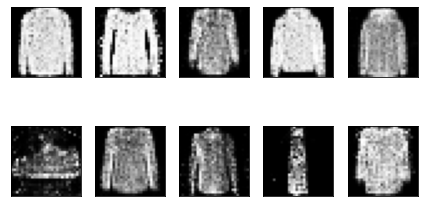

epoch = 42/120, d_loss=0.503, g_loss=2.248                                                                                                     
epoch = 43/120, d_loss=0.502, g_loss=2.128                                                                                                     
epoch = 44/120, d_loss=0.428, g_loss=2.369                                                                                                     
epoch = 45/120, d_loss=0.427, g_loss=2.625                                                                                                     
epoch = 46/120, d_loss=0.420, g_loss=2.291                                                                                                     
epoch = 47/120, d_loss=0.437, g_loss=2.461                                                                                                     
epoch = 48/120, d_loss=0.484, g_loss=2.191                                                                                              

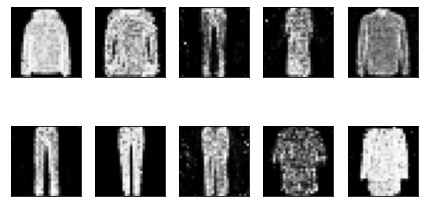

epoch = 52/120, d_loss=0.467, g_loss=2.495                                                                                                     
epoch = 53/120, d_loss=0.410, g_loss=2.436                                                                                                     
epoch = 54/120, d_loss=0.383, g_loss=2.399                                                                                                     
epoch = 55/120, d_loss=0.441, g_loss=2.376                                                                                                     
epoch = 56/120, d_loss=0.438, g_loss=2.414                                                                                                     
epoch = 57/120, d_loss=0.391, g_loss=2.533                                                                                                     
epoch = 58/120, d_loss=0.432, g_loss=2.382                                                                                              

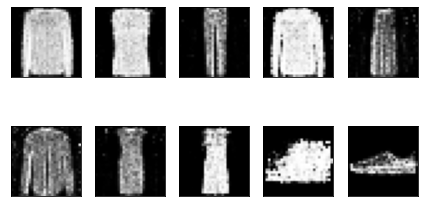

epoch = 62/120, d_loss=0.409, g_loss=2.628                                                                                                     
epoch = 63/120, d_loss=0.373, g_loss=2.836                                                                                                     
epoch = 64/120, d_loss=0.405, g_loss=2.685                                                                                                     
epoch = 65/120, d_loss=0.420, g_loss=2.602                                                                                                     
epoch = 66/120, d_loss=0.425, g_loss=2.463                                                                                                     
epoch = 67/120, d_loss=0.436, g_loss=2.372                                                                                                     
epoch = 68/120, d_loss=0.424, g_loss=2.834                                                                                              

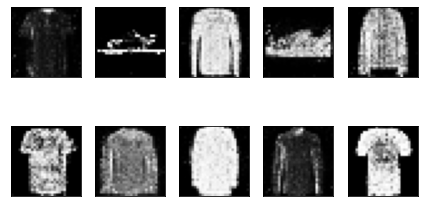

epoch = 72/120, d_loss=0.406, g_loss=2.491                                                                                                     
epoch = 73/120, d_loss=0.393, g_loss=2.629                                                                                                     
epoch = 74/120, d_loss=0.457, g_loss=2.671                                                                                                     
epoch = 75/120, d_loss=0.405, g_loss=2.655                                                                                                     
epoch = 76/120, d_loss=0.381, g_loss=2.913                                                                                                     
epoch = 77/120, d_loss=0.338, g_loss=2.886                                                                                                     
epoch = 78/120, d_loss=0.426, g_loss=2.759                                                                                              

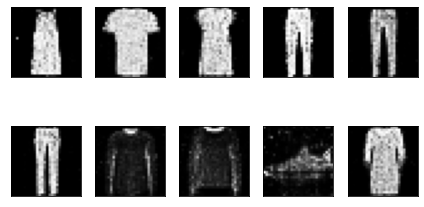

epoch = 82/120, d_loss=0.338, g_loss=2.648                                                                                                     
epoch = 83/120, d_loss=0.415, g_loss=2.936                                                                                                     
epoch = 84/120, d_loss=0.443, g_loss=2.739                                                                                                     
epoch = 85/120, d_loss=0.429, g_loss=2.907                                                                                                     
epoch = 86/120, d_loss=0.412, g_loss=3.004                                                                                                     
epoch = 87/120, d_loss=0.405, g_loss=2.773                                                                                                     
epoch = 88/120, d_loss=0.457, g_loss=2.830                                                                                              

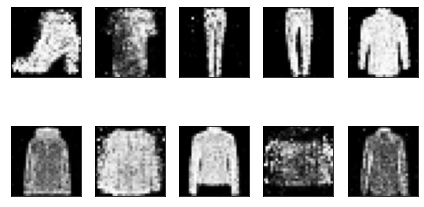

epoch = 92/120, d_loss=0.404, g_loss=3.411                                                                                                     
epoch = 93/120, d_loss=0.389, g_loss=3.162                                                                                                     
epoch = 94/120, d_loss=0.450, g_loss=2.905                                                                                                     
epoch = 95/120, d_loss=0.417, g_loss=2.942                                                                                                     
epoch = 96/120, d_loss=0.372, g_loss=3.042                                                                                                     
epoch = 97/120, d_loss=0.361, g_loss=3.164                                                                                                     
epoch = 98/120, d_loss=0.341, g_loss=3.265                                                                                              

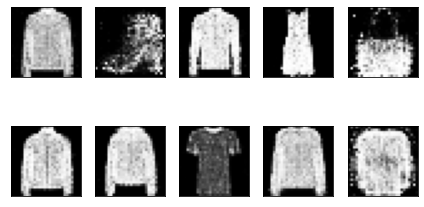

epoch = 102/120, d_loss=0.406, g_loss=2.908                                                                                                     
epoch = 103/120, d_loss=0.420, g_loss=2.886                                                                                                     
epoch = 104/120, d_loss=0.371, g_loss=3.226                                                                                                     
epoch = 105/120, d_loss=0.395, g_loss=2.827                                                                                                     
epoch = 106/120, d_loss=0.383, g_loss=3.462                                                                                                     
epoch = 107/120, d_loss=0.391, g_loss=3.100                                                                                                     
epoch = 108/120, d_loss=0.414, g_loss=2.933                                                                                       

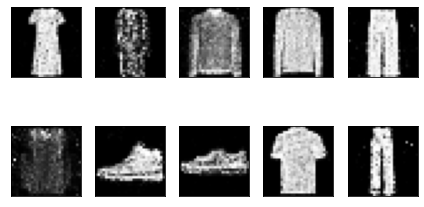

epoch = 112/120, d_loss=0.383, g_loss=3.398                                                                                                     
epoch = 113/120, d_loss=0.350, g_loss=3.151                                                                                                     
epoch = 114/120, d_loss=0.366, g_loss=3.111                                                                                                     
epoch = 115/120, d_loss=0.356, g_loss=3.084                                                                                                     
epoch = 116/120, d_loss=0.367, g_loss=3.031                                                                                                     
epoch = 117/120, d_loss=0.384, g_loss=3.349                                                                                                     
epoch = 118/120, d_loss=0.346, g_loss=3.320                                                                                       

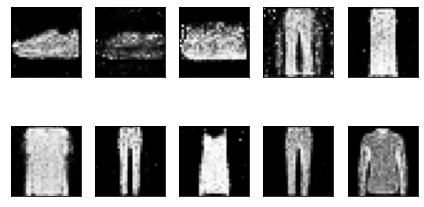

In [16]:
epochs = 120 # Change the no of epochs
batch_size = 64

# Smoothed labels to the discriminator network
# This means we can have decimal values such as 0.9 (true), 0.8 (true), 0.1 (fake), or 0.2 (fake), 
# instead of labeling every example as either 1 (true) or 0 (fake)
smooth = 0.1

# Labels for generated and real data while training
real = np.ones(shape=(batch_size, 1))
fake = np.zeros(shape=(batch_size, 1))

d_loss = []
combined_model_loss = []

for e in range(epochs + 1):
    for i in range(len(X_train) // batch_size):
        
        # Train Discriminator weights
        discriminator.trainable = True
        
        # Real samples
        X_batch = X_train[i*batch_size:(i+1)*batch_size]
        # Return the real loss 
        d_loss_real = discriminator.train_on_batch(x=X_batch, y=real * (1 - smooth))
        
        # Fake Samples
        # To train the generator we need fake images only
        z = np.random.normal(loc=0, scale=1, size=(batch_size, latent_dim))
        X_fake = generator.predict_on_batch(z)
        # Return the fake loss
        d_loss_fake = discriminator.train_on_batch(x=X_fake, y=fake)
         
        # Discriminator loss
        # In order to calculate the overall loss take the mean of the real and fake losses 
        d_loss_batch = 0.5 * (d_loss_real[0] + d_loss_fake[0])
        
        # Train Generator weights
        # During the training of gan,
        # the weights of discriminator should be fixed.
        # We can enforce that by setting the trainable flag
        discriminator.trainable = False
        
        # The input is the noise and the target is our vector of ones
        # This is because we are trying to trick the discriminator into thinking that the images from the generator are real
        combined_model_loss_batch = combined_model.train_on_batch(x=z, y=real)
   
        print('epoch = %d/%d, batch = %d/%d, d_loss=%.3f, g_loss=%.3f' % (e + 1, epochs, i, len(X_train) // batch_size, d_loss_batch, combined_model_loss_batch[0]),100*' ',end='\r')
    
    # Save the losses (Append both losses to the lists of losses)
    d_loss.append(d_loss_batch)
    combined_model_loss.append(combined_model_loss_batch[0])
    print('epoch = %d/%d, d_loss=%.3f, g_loss=%.3f' % (e + 1, epochs, d_loss[-1], combined_model_loss[-1]), 100*' ')

    if e % 10 == 0:
        samples = 10
        # Generate fake MNIST images from noised input
        x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples, latent_dim)))

        for k in range(samples):
            plt.subplot(2, 5, k+1)
            plt.imshow(x_fake[k].reshape(28, 28), cmap='gray')
            plt.xticks([])
            plt.yticks([])

        plt.tight_layout()
        plt.show()

### Please answer the questions below to complete the experiment:

In [12]:
#@title State True or False: The generator model in GANs takes random noise as input data and generates a new image
Answer = "TRUE" #@param ["","TRUE", "FALSE"] 


In [13]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [14]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "na" #@param {type:"string"}


In [15]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [16]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Didn't use" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [17]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [18]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Didn't use" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [19]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 15452
Date of submission:  26 Jun 2021
Time of submission:  13:33:37
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
